# Generating random numbers as input

In [1]:
import random

mylist = [] # Taking an array of random numbers

for i in range(0,1500):
    x = random.randint(1,100)
    mylist.append(x)
#print(mylist)
#print(len(mylist))

# Importing the required python packages 

In [2]:
import pandas as pd  #for the creation of datasets
import time
import psutil   # It is a library for profiling system-level information 
import cProfile# It is a library for profiling user-level information
import time

# Python Code for Shell Sort, profiling user and system-level information

In [3]:
def shellSort(arr):
    gap = len(arr) // 2 # initialize the gap
 
    while gap > 0:
        i = 0
        j = gap
         
        # check the array in from left to right
        # till the last possible index of j
        while j < len(arr):
     
            if arr[i] >arr[j]:
                arr[i],arr[j] = arr[j],arr[i]
             
            i += 1
            j += 1
         
            # now, we look back from ith index to the left
            # we swap the values which are not in the right order.
            k = i
            while k - gap > -1:
 
                if arr[k - gap] > arr[k]:
                    arr[k-gap],arr[k] = arr[k],arr[k-gap]
                k -= 1
 
        gap //= 2
pr=cProfile.Profile()  # Profiler for user information
pr.enable()
start=time.time()
p1 = psutil.Process()  # psutil for system information
p1.cpu_percent()
mem = p1.memory_full_info()
shellSort(mylist)
print("full mem information:", mem)
print('memory rss:', mem[0]/2.**30 , "GB")
print('memory vms:', mem[1]/2.**30 , "GB")
print('pfaults:', mem[2])
print('pageins:', mem[3])
print('memory uss:', mem[4]/2.**30 , "GB")
print("cpu percent:", p1.cpu_percent())
print("cpu time:", p1.cpu_times())
pr.disable()
end=time.time()
pr.print_stats(sort='time')

# creating a dataframe for storing the system-level information of shell sort
df1= pd.DataFrame({'Program': ['shellSort'],
        'Process id':[p1.pid],'RSS in GB':[mem[0]/2.*30], 'VMS in GB':[mem[1]/2.*30],'Page Faults':[mem[2]],'Page ins': [mem[3]],
                     'Memory USS (GB)':[mem[4]/2.**30 ], 'CPU Percent':[p1.cpu_percent()],'CPU Time': [p1.cpu_times()], 'Running time': [(round((end-start),3))],
                      })
print(df1)
    

full mem information: pfullmem(rss=98607104, vms=104738816, num_page_faults=24897, peak_wset=98607104, wset=98607104, peak_paged_pool=713016, paged_pool=713000, peak_nonpaged_pool=148312, nonpaged_pool=128432, pagefile=104738816, peak_pagefile=104738816, private=104738816, uss=75673600)
memory rss: 0.09183502197265625 GB
memory vms: 0.09754562377929688 GB
pfaults: 24897
pageins: 98607104
memory uss: 0.09183502197265625 GB
cpu percent: 99.2
cpu time: pcputimes(user=2.890625, system=0.875, children_user=0.0, children_system=0.0)
         14432 function calls (14431 primitive calls) in 1.907 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.900    1.900    1.902    1.902 1971363569.py:1(shellSort)
        1    0.004    0.004    0.004    0.004 {built-in method psutil_windows.proc_memory_uss}
    13556    0.001    0.000    0.001    0.000 {built-in method builtins.len}
       39    0.000    0.000    0.000    0.000 so

# Python code for Recursive Bubble Sort, profiling user and system-level information

In [4]:
# Utility function to swap values at two indices in the list
def swap(A, i, j):
 
    temp = A[i]
    A[i] = A[j]
    A[j] = temp
 
 
# Recursive function to perform bubble sort on sublist `A[i…n]`
def bubbleSort(A, n):
 
    for i in range(n - 1):
        if A[i] > A[i + 1]:
            swap(A, i, i + 1)
 
    if n - 1 > 1:
        bubbleSort(A, n - 1)
        
A = mylist
p2 = psutil.Process()
p2.cpu_percent()
mem = p2.memory_full_info()
start=time.time()
bubbleSort(A, len(A))

print("full mem information:", mem)
print('memory rss:', mem[0]/2.**30 , "GB")
print('memory vms:', mem[1]/2.**30 , "GB")
print('pfaults:', mem[2])
print('pageins:', mem[3])
print('memory uss:', mem[4]/2.**30 , "GB")
#print("cpu percent:", p2.cpu_percent())
#sort = bubbleSort(array)
#pr.disable()
# print the sorted list
   
# print(A)
end=time.time()
df2= pd.DataFrame({'Program': ['bubbleSort'],
        'Process id':[p2.pid],'RSS in GB':[mem[0]/2.*30], 'VMS in GB':[mem[1]/2.*30],'Page Faults':[mem[2]],'Page ins': [mem[3]],
                     'Memory USS (GB)':[mem[4]/2.**30 ], 'CPU Percent':[p2.cpu_percent()],'CPU Time': [p2.cpu_times()], 'Running time': [(round((end-start),3))],
                      })
print(df2)
print("time consumed:{}secs".format(end-start))

full mem information: pfullmem(rss=99659776, vms=105742336, num_page_faults=25156, peak_wset=99659776, wset=99659776, peak_paged_pool=716144, paged_pool=715864, peak_nonpaged_pool=148312, nonpaged_pool=131152, pagefile=105742336, peak_pagefile=105742336, private=105742336, uss=76070912)
memory rss: 0.09281539916992188 GB
memory vms: 0.098480224609375 GB
pfaults: 25156
pageins: 99659776
memory uss: 0.09281539916992188 GB
      Program  Process id     RSS in GB     VMS in GB  Page Faults  Page ins  \
0  bubbleSort       10504  1.494897e+09  1.586135e+09        25156  99659776   

   Memory USS (GB)  CPU Percent                        CPU Time  Running time  
0         0.092815         87.5  (3.015625, 0.921875, 0.0, 0.0)          0.11  
time consumed:0.1097557544708252secs


# Python code for running the two programs simultaneously, Profiling user and system-level data

In [5]:
import multiprocessing #This is a library for simultaneous running of algorithms
import os
if __name__ == "__main__":
   
    pr1=cProfile.Profile()
    pr1.enable()
    p0=psutil.Process()
    p0.cpu_percent()
    mem0 = p0.memory_full_info()
    start1=time.time()
    mp1 = multiprocessing.Process(target=shellSort(mylist))
    mp1.start()
    pr2=cProfile.Profile()
    pr2.enable()
    p3=psutil.Process()
    p3.cpu_percent()
    mem1 = p3.memory_full_info()
    start2=time.time()
    mp2 = multiprocessing.Process(target=bubbleSort(mylist,len(mylist)))
    mp2.start()
    mp1.join()
    pr1.disable()
    end1=time.time()
    pr1.print_stats()
    print("full mem information:", mem0)
    print('memory rss:', mem0[0]/2.**30 , "GB")
    print('memory vms:', mem0[1]/2.**30 , "GB")
    print('pfaults:', mem0[2])
    print('pageins:', mem0[3])
    print('memory uss:', mem0[4]/2.**30 , "GB")
    print("cpu percent:", p0.cpu_percent())
    print("cpu time:", p0.cpu_times())
    mp2.join()
    pr2.disable()
    end2=time.time()
    pr2.print_stats()
    print("full mem information:", mem1)
    print('memory rss:', mem1[0]/2.**30 , "GB")
    print('memory vms:', mem1[1]/2.**30 , "GB")
    print('pfaults:', mem1[2])
    print('pageins:', mem1[3])
    print('memory uss:', mem1[4]/2.**30 , "GB")
    print("cpu time:", p3.cpu_times())
    df3= pd.DataFrame({'Program': ['shellSort'],
        'Process id':[p3.pid],'RSS in GB':[mem0[0]/2.*30], 'VMS in GB':[mem0[1]/2.*30],'Page Faults':[mem0[2]],'Page ins': [mem0[3]],
                     'Memory USS (GB)':[mem0[4]/2.**30 ], 'CPU Percent':[p0.cpu_percent()],'CPU Time': [p0.cpu_times()], 'Running time': [(round((end1-start1),3))],
                      })
    print(df3)
    df4= pd.DataFrame({'Program': ['bubbleSort'],
        'Process id':[p0.pid],'RSS in GB':[mem1[0]/2.*30], 'VMS in GB':[mem1[1]/2.*30],'Page Faults':[mem1[2]],'Page ins': [mem1[3]],
                     'Memory USS (GB)':[mem1[4]/2.**30 ], 'CPU Percent':[p3.cpu_percent()],'CPU Time': [p3.cpu_times()], 'Running time': [(round((end2-start2),3))],
                      })
    print(df4)
    
    
print("done")

         14374 function calls (14354 primitive calls) in 1.950 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.737    1.737    1.739    1.739 1971363569.py:1(shellSort)
      3/1    0.000    0.000    0.003    0.003 <frozen importlib._bootstrap>:1002(_find_and_load)
      6/2    0.000    0.000    0.001    0.001 <frozen importlib._bootstrap>:1033(_handle_fromlist)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:112(release)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:152(__init__)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:156(__enter__)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:160(__exit__)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:166(_get_module_lock)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:185(cb)
      5/1    0.

# Comparison of both the algorithms when run alone

In [6]:
import matplotlib.pyplot as plt # This library is used for data visualization
import numpy as np 
from psutil import cpu_percent
data1=pd.concat([df1,df2])
data1

,Program,Process id,RSS in GB,VMS in GB,Page Faults,Page ins,Memory USS (GB),CPU Percent,CPU Time,Running time
0,shellSort,10504,1.479107e+09,1.571082e+09,24897,98607104,0.091835,100.8,"(2.921875, 0.875, 0.0, 0.0)",1.898
0,bubbleSort,10504,1.494897e+09,1.586135e+09,25156,99659776,0.092815,87.5,"(3.015625, 0.921875, 0.0, 0.0)",0.110


# Bar Graph Visualization for the running time of algorithms when run alone

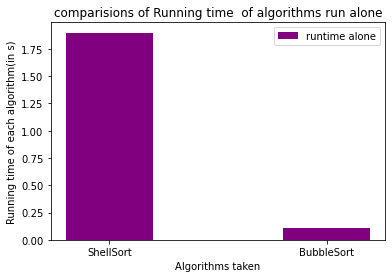

In [20]:
w = 0.4
x=['ShellSort','BubbleSort']
br1 = np.arange(len(x))
br2 = [x+w for x in br1]
plt.bar(br1,data1["Running time"],w,label='runtime alone',color="purple")
plt.xticks(br1,x)
plt.xlabel("Algorithms taken")
plt.ylabel("Running time of each algorithm(in s)")
plt.title("comparisions of Running time  of algorithms run alone")
plt.legend()
plt.show()

# Bar Graph Visualization of the CPU Utilization of two algorithms when run alone 

Text(0.5, 1.0, 'comparision of CPU Percent  of algorithms when run alone')

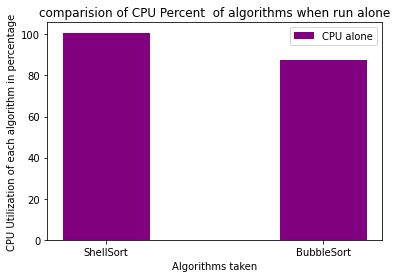

In [23]:
w = 0.4
x=['ShellSort','BubbleSort']
br1 = np.arange(len(x))
br2 = [x+w for x in br1]
plt.bar(br1,data1['CPU Percent'],w,label='CPU alone', color="purple")
plt.xticks(br1,x)
plt.legend()
plt.xlabel("Algorithms taken")
plt.ylabel("CPU Utilization of each algorithm in percentage")
plt.title("comparision of CPU Percent  of algorithms when run alone")

# Comparison of both the algorithms when run simultaneously

In [7]:
data2=pd.concat([df3,df4])
data2

,Program,Process id,RSS in GB,VMS in GB,Page Faults,Page ins,Memory USS (GB),CPU Percent,CPU Time,Running time
0,shellSort,10504,1.524941e+09,1.612001e+09,25645,101662720,0.094681,120.2,"(5.078125, 0.984375, 0.0, 0.0)",1.944
0,bubbleSort,10504,1.529057e+09,1.615995e+09,25712,101937152,0.094936,104.2,"(5.09375, 0.984375, 0.0, 0.0)",0.328


# Bar Graph Visualization for the CPU Utilization of the two algorithms when run alone

Text(0.5, 1.0, 'comparision of CPU Percent  of algorithms when run alone')

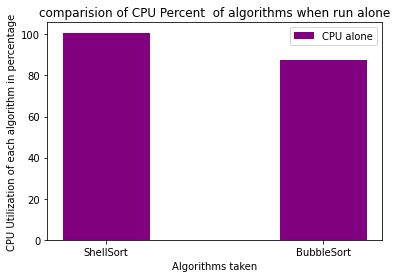

In [22]:
w = 0.4
x=['ShellSort','BubbleSort']
br1 = np.arange(len(x))
br2 = [x+w for x in br1]
plt.bar(br1,data1['CPU Percent'],w,label='CPU alone', color="purple")
plt.xticks(br1,x)
plt.legend()
plt.xlabel("Algorithms taken")
plt.ylabel("CPU Utilization of each algorithm in percentage")
plt.title("comparision of CPU Percent  of algorithms when run alone")

# Bar Graph Visualization of the two algorithms

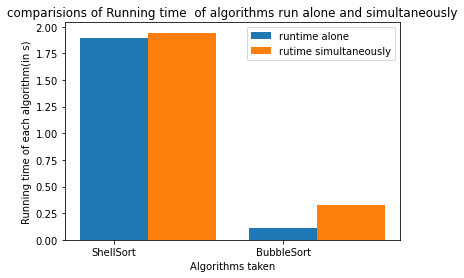

In [13]:
w = 0.4
x=['ShellSort','BubbleSort']
br1 = np.arange(len(x))
br2 = [x+w for x in br1]
plt.bar(br1,data1["Running time"],w,label='runtime alone')
plt.bar(br2,data2["Running time"],w,label='rutime simultaneously')
plt.xticks(br1,x)
plt.xlabel("Algorithms taken")
plt.ylabel("Running time of each algorithm(in s)")
plt.title("comparisions of Running time  of algorithms run alone and simultaneously")

plt.legend()
plt.show()

# Comapring CPU Utilization in Percentage

Text(0.5, 1.0, 'comparisions of CPU Percent  of algorithms run alone and simultaneously')

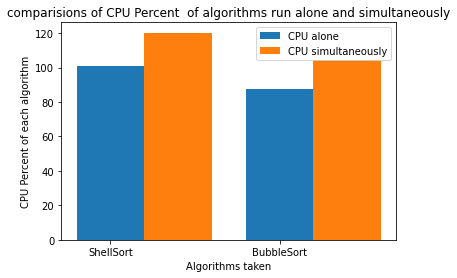

In [14]:
w = 0.4
x=['ShellSort','BubbleSort']
br1 = np.arange(len(x))
br2 = [x+w for x in br1]
plt.bar(br1,data1['CPU Percent'],w,label='CPU alone')
plt.bar(br2,data2['CPU Percent'],w,label='CPU simultaneously')
plt.xticks(br1,x)
plt.legend()
plt.xlabel("Algorithms taken")
plt.ylabel("CPU Utilization of each algorithm in percentage")
plt.title("comparision of CPU Percent  of algorithms when run alone and simultaneously")

# SnakeViz

In [10]:
%reload_ext snakeviz
%snakeviz shellSort(mylist)

 
*** Profile stats marshalled to file 'C:\\Users\\KAVYA\\AppData\\Local\\Temp\\tmp1wvk00s4'. 
Embedding SnakeViz in this document...


In [11]:
%reload_ext snakeviz
%snakeviz bubbleSort(mylist,len(mylist))

 
*** Profile stats marshalled to file 'C:\\Users\\KAVYA\\AppData\\Local\\Temp\\tmp69yabpn2'. 
Embedding SnakeViz in this document...
